This is the link for the Kaggle Project that I am doing: https://www.kaggle.com/competitions/santander-customer-satisfaction/overview  

The challenge involves using a machine learning modedl in order to predict, based on the feature columns, whether customers were saisfied with their shopping experience. The dataset is made up of both numerical/float type values and categorical/int type values. The Target column of the dataset is 0s, which means that the customer was satisfied. and 1s, which means that the customer was unsatisfied, meaning that the challenge is a binary classification type problem. This notebook contains the attempt to complete the Customer Satisfaction Kaggle Competition.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
from sklearn.preprocessing import LabelEncoder

# Data Loading

In [2]:
data = pd.read_csv('train.csv')
df=data.drop(columns=['ID'])
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
dataset_size=df.shape
print(dataset_size)

(76020, 370)


Here we can see that there are 76020 rows and 370 columns after dropping the ID column. 

In [15]:
feature_info = pd.DataFrame(columns=['Feature', 'Type', 'Values', 'Missing_Values', 'Outliers'])

for column in df.columns:
    #find feature data type
    feature_type = 'Categorical' if df[column].dtype == 'object' else 'Numerical'

    #find values
    if feature_type == 'Categorical':
        values = ', '.join(map(str, df[column].unique()))
    else:
        values = f"{df[column].min()}-{df[column].max()}"

    #find missing values
    missing_values = df[column].isnull().sum()

    #find outliers
    z_scores = stats.zscore(df[column])
    outliers = (abs(z_scores) > 3).sum()
    
    feature_info = pd.concat([feature_info, pd.DataFrame({
        'Feature': [column],
        'Type': [feature_type],
        'Values': [values],
        'Missing_Values': [missing_values],
        'Outliers': [outliers]
    })], ignore_index=True)

print(feature_info)


                     Feature       Type               Values Missing_Values  \
0                       var3  Numerical          -999999-238              0   
1                      var15  Numerical                5-105              0   
2         imp_ent_var16_ult1  Numerical         0.0-210000.0              0   
3    imp_op_var39_comer_ult1  Numerical         0.0-12888.03              0   
4    imp_op_var39_comer_ult3  Numerical         0.0-21024.81              0   
..                       ...        ...                  ...            ...   
365  saldo_medio_var44_hace3  Numerical         0.0-24650.01              0   
366   saldo_medio_var44_ult1  Numerical         0.0-681462.9              0   
367   saldo_medio_var44_ult3  Numerical         0.0-397884.3              0   
368                    var38  Numerical  5163.75-22034738.76              0   
369                   TARGET  Numerical                  0-1              0   

    Outliers  
0        116  
1       1245  
2     

From this table, it can be seen that most of the feature columns are numerical, however it should be noted that this includes columns that only have a few unique class values. Therefore, even though the variables are numerical, there are some that are categorical. Additionally, the range of the values start from 0 and go up to certain numbers like 210000 or 1 depending on the column. Var3 does seem to have an arbirtary number is -99999999 set in place of maybe an invalid or missing entry, and thanks to that there are currently no missing entries. An outlier is a number that is significantly different than the majority of the datspoints, and typically outliers can skew the data because of their distance. The columns all have some outliers, but none that are extremely large. 1400 out of 76000 is not large. 

(array([73012.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

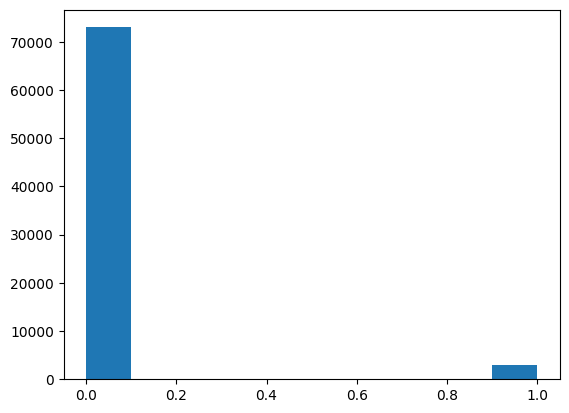

In [6]:
plt.hist(df['TARGET'])

The target column is made up of 0s and 1s. There is a large class imbalance between 0 and 1 with more than 95% of the data being class 0. 

# Data Visualization

In [16]:
df_0=df[df['TARGET']==0]
df_1=df[df['TARGET']==1]

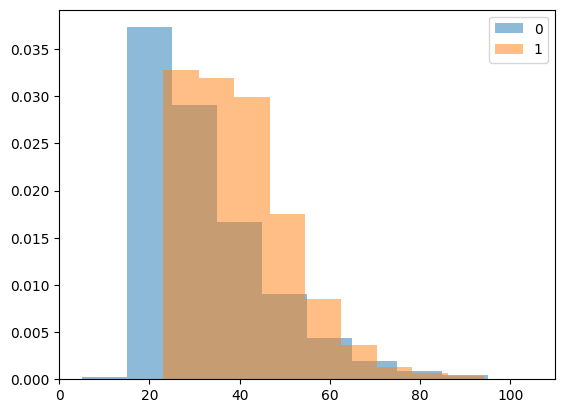

In [17]:
plt.hist(df_0['var15'], density=1, alpha=0.5, label='0')
plt.hist(df_1['var15'], density=1, alpha=0.5, label='1')
plt.legend()


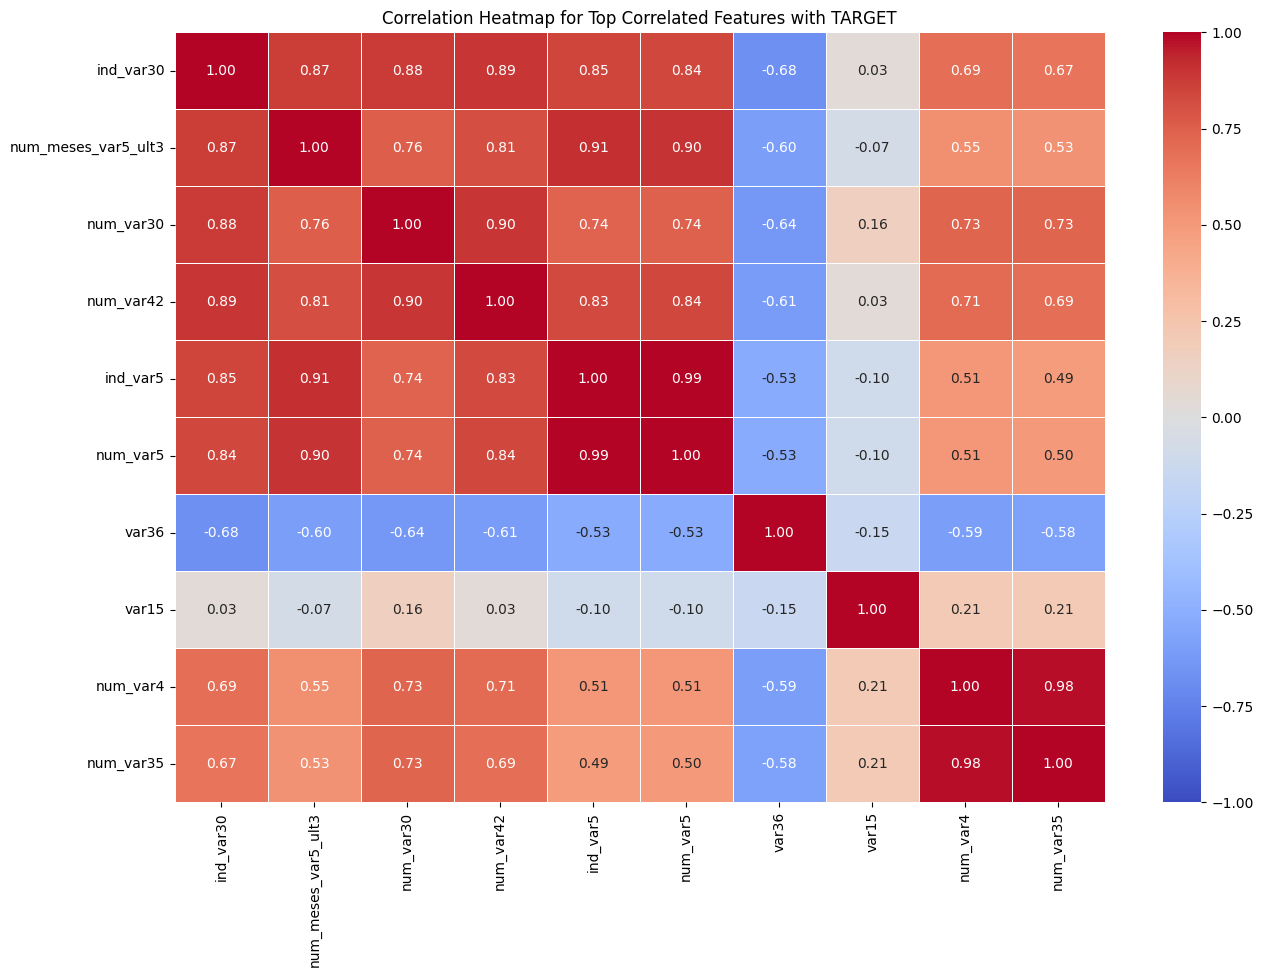

In [26]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['TARGET'].abs()

sorted_correlations = correlation_with_target.sort_values(ascending=False)
top_correlated_features = sorted_correlations.head(11).index
df_top_correlated = df[top_correlated_features].drop(['ID', 'TARGET'], axis=1, errors='ignore')

plt.figure(figsize=(15, 10))
sns.heatmap(df_top_correlated.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Top Correlated Features with TARGET')
plt.show()

In [27]:
n = df.shape[0]

# Check target type is float
a_value = df['TARGET'].to_numpy()[0]
float_check = isinstance(a_value, np.float64)

# Check number of unique targets
n_unique = len(np.unique(df['TARGET']))

# Filter only float columns
df_train_float = df.select_dtypes(include='float64')

n_features = df_train_float.shape[1]
any_null = np.any(df_train_float.isnull())

In [28]:
dataset_name = "Customer Satisfaction" 

binary_classification = n_unique == 2
multiclass_classification = n_unique < n / 10 and not binary_classification
regression = not binary_classification and not multiclass_classification

dataset_summary = {
    dataset_name: [dataset_name, binary_classification,
                   multiclass_classification, regression, n,
                   any_null, n_features]
}

In [29]:
def load_dataset(dataset_name):
    return {"Training": df, "Target": df['TARGET'], "Attributes": df.columns.tolist()}

binary_classification_datasets = list(map(lambda x: x[0], filter(lambda t: t[1][1], dataset_summary.items())))

In [30]:
d1 = load_dataset(binary_classification_datasets[0])

In [31]:
def compare_corr_features_binary(d, logscale=False, top_features=10):
    # Divide into separate dfs
    df_0 = d["Training"][d["Target"] == 0]
    df_1 = d["Training"][d["Target"] == 1]

    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])

    # top correlated features
    top_correlated_features = d["Training"].corr()['TARGET'].abs().sort_values(ascending=False).head(top_features).index

    # Make a grid of plots
    N_Features = len(top_correlated_features)
    N_X = math.ceil(math.sqrt(N_Features))
    N_Y = math.floor(math.sqrt(N_Features))
    if N_X * N_Y < N_Features:
        N_Y += 1

    print("Found", N_Features, "features. Creating a grid of", N_X, "by", N_Y)

    # Histogram 
    plt.figure(figsize=(50, 50))

    for i, column in enumerate(top_correlated_features):
        KS_test = scipy.stats.kstest(df_0[column], df_1[column]).statistic
        print(column, "KS Distribution Similarity Test:", KS_test)

        plt.subplot(N_X, N_Y, i + 1)
        plt.title(str(KS_test))
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=100, histtype="step", color="red", label="0", density=1, stacked=True)
        plt.hist(df_1[column], bins=100, histtype="step", color="blue", label="1", density=1, stacked=True)
        plt.legend()
        plt.xlabel(column)

    plt.show()


Number of category 0: 73012
Number of category 1: 3008
Found 10 features. Creating a grid of 4 by 3
TARGET KS Distribution Similarity Test: 1.0
ind_var30 KS Distribution Similarity Test: 0.34003828137840353
num_meses_var5_ult3 KS Distribution Similarity Test: 0.3377370712013531
num_var30 KS Distribution Similarity Test: 0.34003828137840353
num_var42 KS Distribution Similarity Test: 0.32818962068024954
ind_var5 KS Distribution Similarity Test: 0.3280013683265123
num_var5 KS Distribution Similarity Test: 0.3280013683265123
var36 KS Distribution Similarity Test: 0.25905756821087994
var15 KS Distribution Similarity Test: 0.360369918060686
num_var4 KS Distribution Similarity Test: 0.3337878333319734


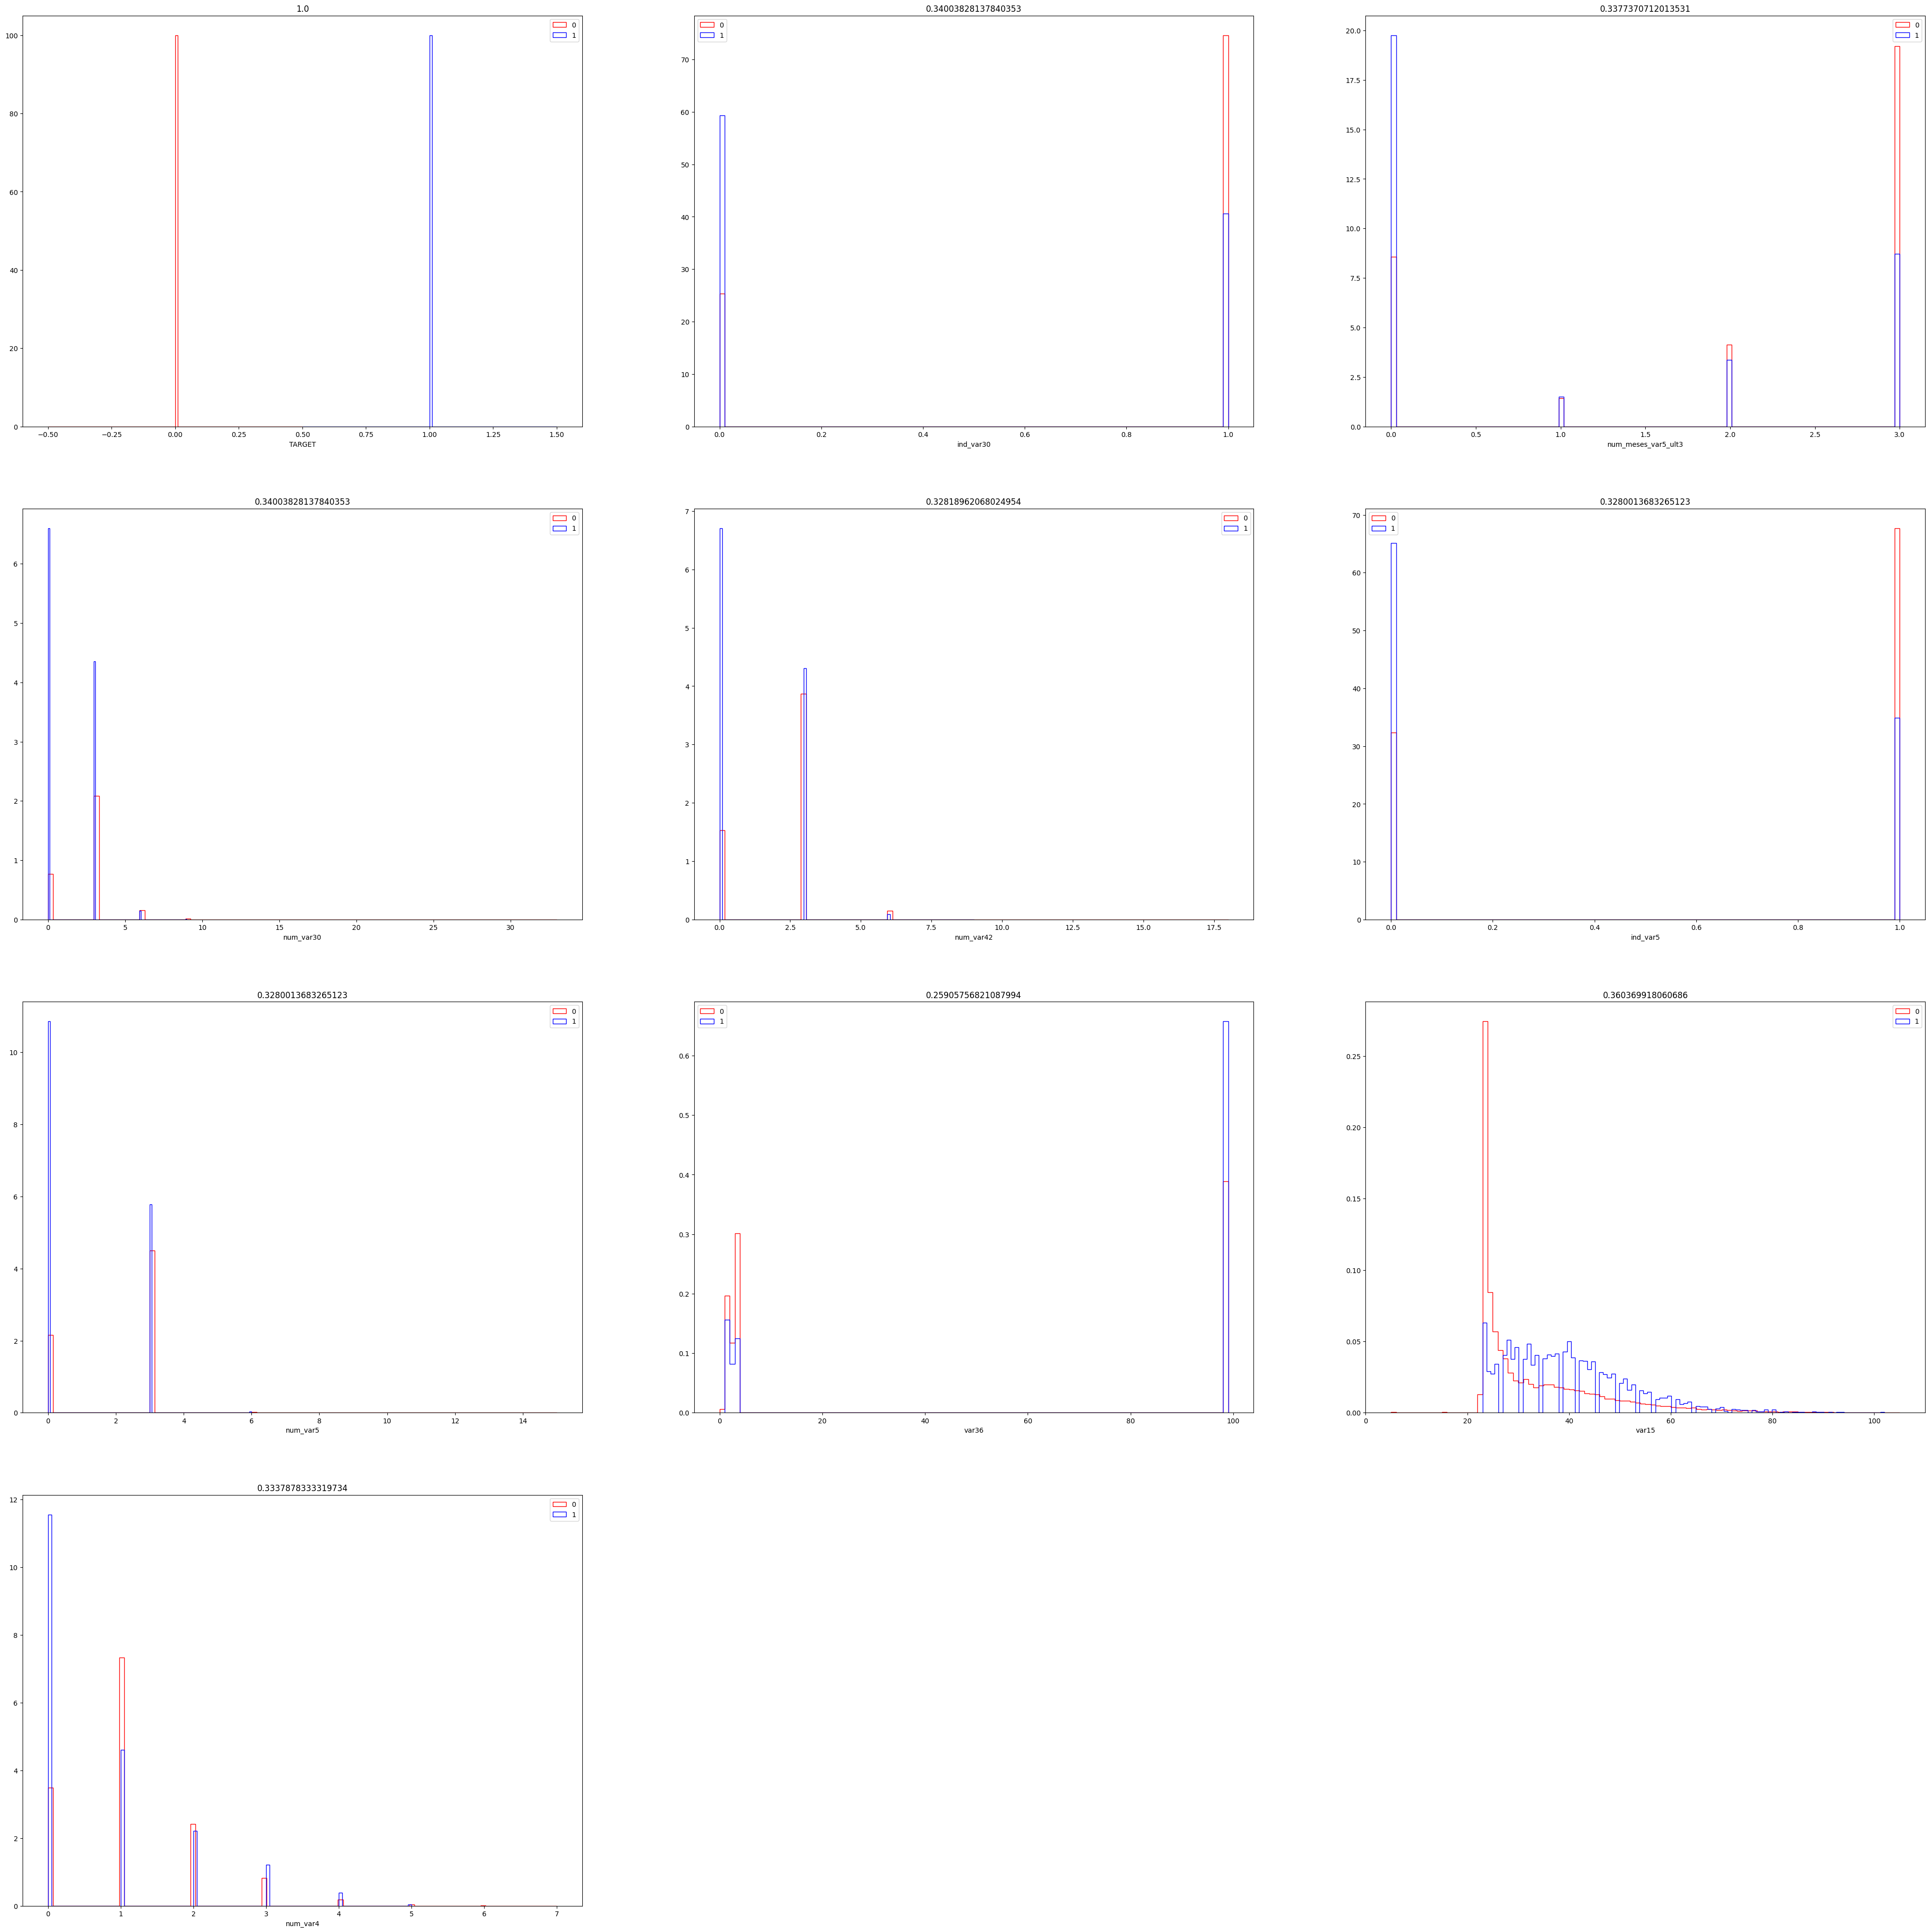

In [32]:
compare_corr_features_binary(d1, top_features=10)

In [25]:
results = {}

# get the overall percentages from columns
for column in df.columns[:-1]:  
    target_counts = df.groupby(column)['TARGET'].value_counts(normalize=True).unstack(fill_value=0) * 100

    results[column] = target_counts

for column, percentages in results.items():
    print(f"Overall percentages for {column}:")
    print(percentages)
    print("\n")

Overall percentages for var3:
TARGET            0          1
var3                          
-999999   98.275862   1.724138
 0        92.000000   8.000000
 1        89.523810  10.476190
 2        96.021034   3.978966
 3        98.148148   1.851852
...             ...        ...
 228     100.000000   0.000000
 229     100.000000   0.000000
 231     100.000000   0.000000
 235     100.000000   0.000000
 238     100.000000   0.000000

[208 rows x 2 columns]


Overall percentages for var15:
TARGET      0     1
var15              
5       100.0   0.0
6       100.0   0.0
7       100.0   0.0
8       100.0   0.0
9       100.0   0.0
...       ...   ...
100     100.0   0.0
101     100.0   0.0
102      75.0  25.0
104     100.0   0.0
105     100.0   0.0

[100 rows x 2 columns]


Overall percentages for imp_ent_var16_ult1:
TARGET                       0           1
imp_ent_var16_ult1                        
0.00                 96.065061    3.934939
0.06                  0.000000  100.000000
0.30    

For the machine learning task, the top correlated features that are shown in the histograms above seem the most promising as they either have well spread out distributions or high instances of 1s.

# Data Preparation and Cleaning

To prepare the data for machine learning categorical values that 

In [38]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].nunique() > 2:  
        df[column] = label_encoder.fit_transform(df[column])

In [51]:
n0 = 73012
n1 = 3008

w0 = 1/(n0 / (n1 + n0))
w1 = 1/(n1 / (n1 + n0))

class_weights_eq = {0: w0, 1: w1}

print("Custom Class Weights:", class_weights_eq)


Custom Class Weights: {0: 1.041198707061853, 1: 25.272606382978726}


In [52]:
#alt weights
class_counts = df['TARGET'].value_counts()
class_weights = {0: 1.0, 1: 0.8 * (class_counts[0] / class_counts[1])}

# Machine Learning 

**Logistic regression**

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Split into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Logistic regression
model = LogisticRegression(random_state=42, class_weight=class_weights_eq)

# Train model
model.fit(X_train, y_train)

# Make predictions on validation
y_val_pred = model.predict(X_val)

# Evaluate validation set
print("Validation Set Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))
print("Validation Set Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Make predictions on test 
y_test_pred = model.predict(X_test)

# Evaluate performance on the test
print("\nTest Set Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Set Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Validation Set Accuracy: 0.6971849513285977
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     10933
           1       0.09      0.71      0.16       470

    accuracy                           0.70     11403
   macro avg       0.54      0.70      0.49     11403
weighted avg       0.95      0.70      0.79     11403

Validation Set Confusion Matrix:
[[7615 3318]
 [ 135  335]]

Test Set Accuracy: 0.6859598351311058
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.68      0.81     10958
           1       0.08      0.71      0.15       445

    accuracy                           0.69     11403
   macro avg       0.53      0.70      0.48     11403
weighted avg       0.95      0.69      0.78     11403

Test Set Confusion Matrix:
[[7505 3453]
 [ 128  317]]


/home/emily4664/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


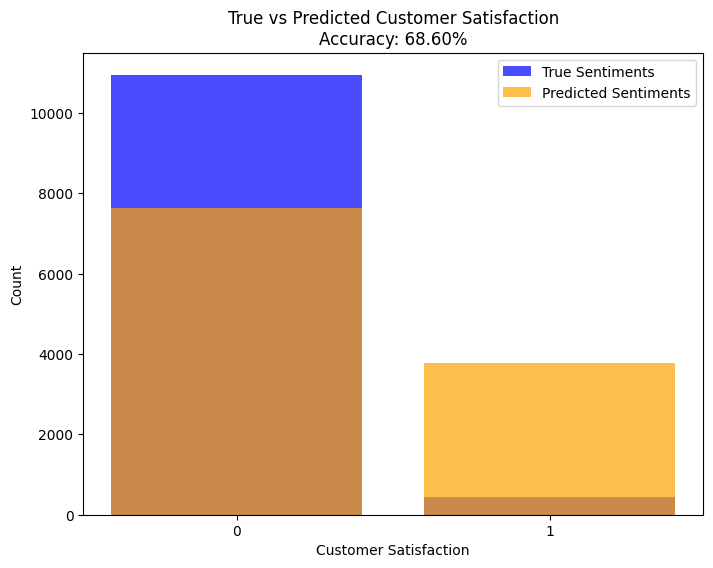

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

# Test predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(np.arange(len(conf_matrix)), conf_matrix.sum(axis=1), color='blue', alpha=0.7, label='True Sentiments')
ax.bar(np.arange(len(conf_matrix)), conf_matrix.sum(axis=0), color='orange', alpha=0.7, label='Predicted Sentiments')

ax.set_xticks(np.arange(len(conf_matrix)))
ax.set_xticklabels(sorted(y_test.unique()))  
ax.set_xlabel('Customer Satisfaction')
ax.set_ylabel('Count')
ax.set_title(f'True vs Predicted Customer Satisfaction\nAccuracy: {accuracy * 100:.2f}%')
ax.legend()

plt.show()


F1 Score Table:
              precision    recall  f1-score
Class 0        0.983231  0.684888  0.807380
Class 1        0.084085  0.712360  0.150415
accuracy       0.685960  0.685960  0.685960
macro avg      0.533658  0.698624  0.478898
weighted avg   0.948142  0.685960  0.781742


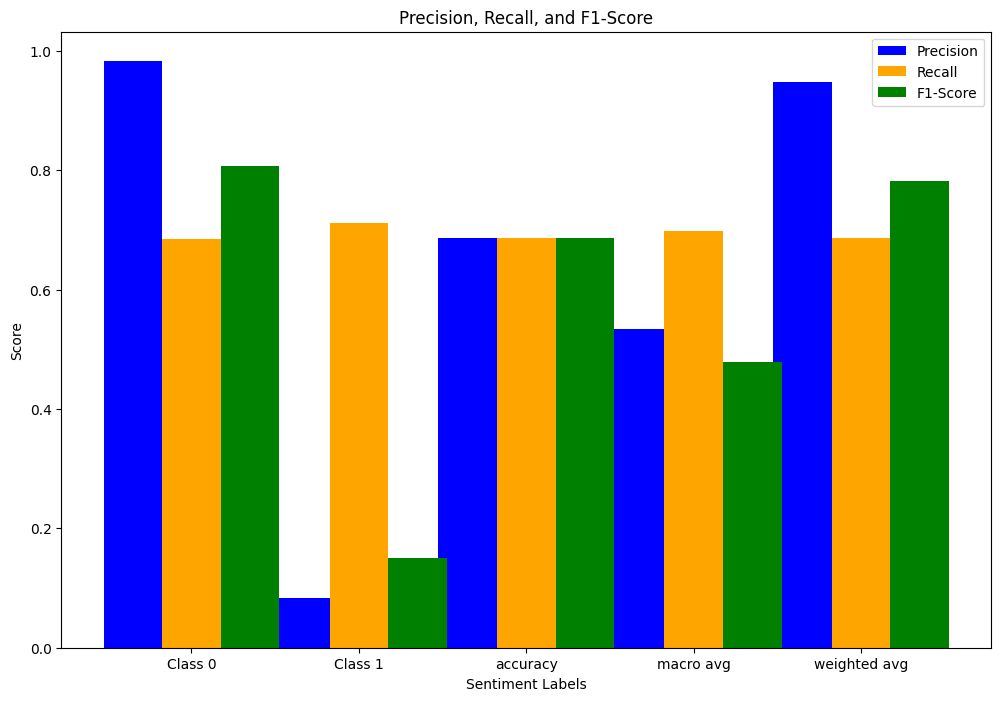

In [49]:
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

df_class_report = pd.DataFrame(class_report).transpose()

print("F1 Score Table:")
print(df_class_report[['precision', 'recall', 'f1-score']])

# F1
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(df_class_report))
bar1 = ax.bar(index, df_class_report['precision'], bar_width, label='Precision', color='blue')
bar2 = ax.bar(index + bar_width, df_class_report['recall'], bar_width, label='Recall', color='orange')
bar3 = ax.bar(index + 2 * bar_width, df_class_report['f1-score'], bar_width, label='F1-Score', color='green')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(df_class_report.index)
ax.set_xlabel('Sentiment Labels')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score')
ax.legend()

plt.show()


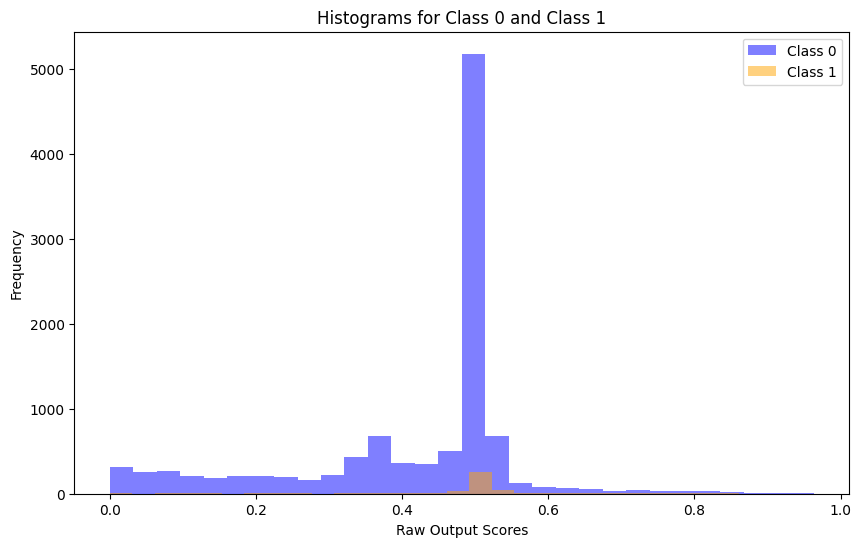

In [56]:
y_scores_logistic = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))

# Histogram for Class 0
plt.hist(y_scores_logistic[y_test == 0], bins=30, color='blue', alpha=0.5, label='Class 0')

# Histogram for Class 1
plt.hist(y_scores_logistic[y_test == 1], bins=30, color='orange', alpha=0.5, label='Class 1')

plt.title('Histograms for Class 0 and Class 1')
plt.xlabel('Raw Output Scores')
plt.ylabel('Frequency')
plt.legend()

plt.show()


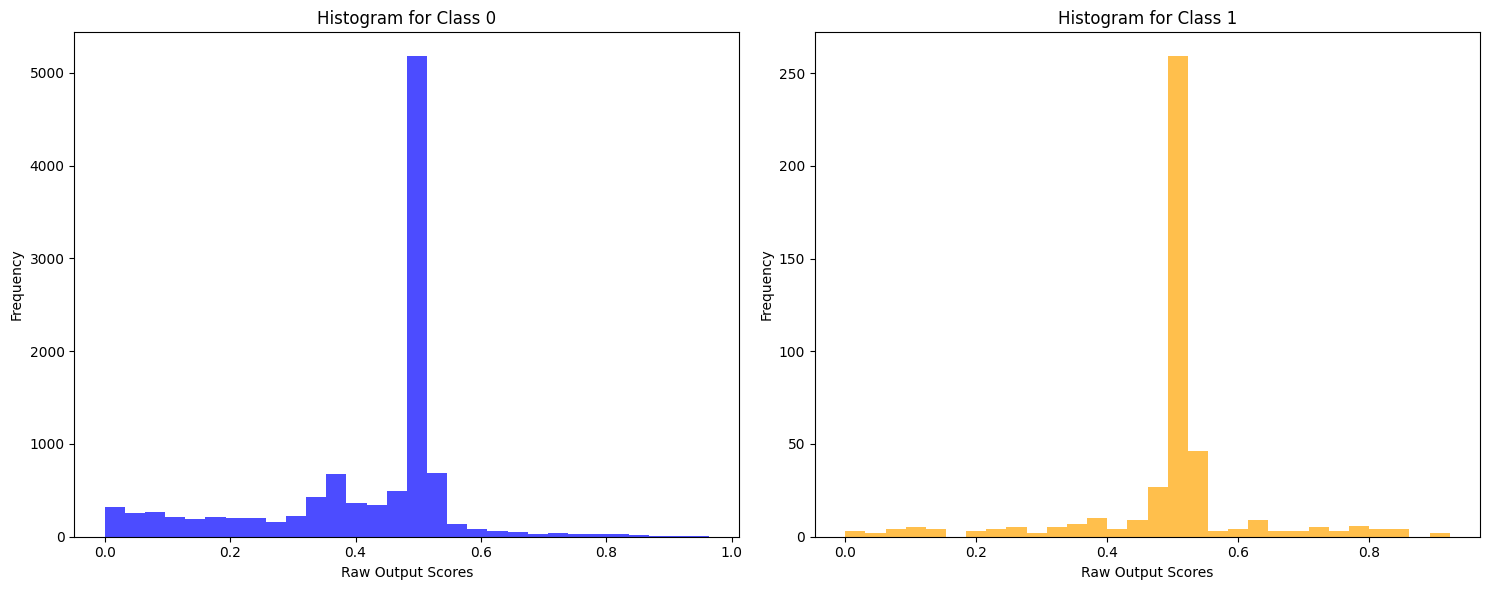

In [57]:
y_scores_logistic = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(15, 6))

# Histogram for Class 0
plt.subplot(1, 2, 1)
plt.hist(y_scores_logistic[y_test == 0], bins=30, color='blue', alpha=0.7)
plt.title('Histogram for Class 0')
plt.xlabel('Raw Output Scores')
plt.ylabel('Frequency')

# Histogram for Class 1
plt.subplot(1, 2, 2)
plt.hist(y_scores_logistic[y_test == 1], bins=30, color='orange', alpha=0.7)
plt.title('Histogram for Class 1')
plt.xlabel('Raw Output Scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

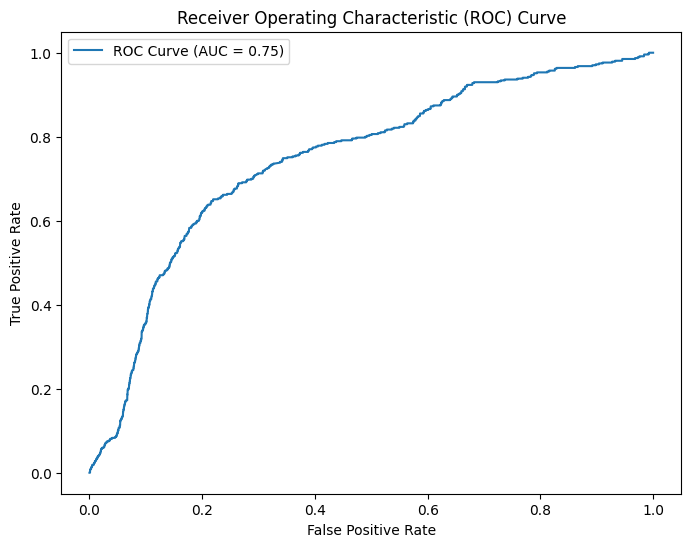

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
y_val_probs = model.predict_proba(X_val)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)

# AUC
auc = roc_auc_score(y_val, y_val_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Attempt to use model on Kaggle Challenge

In [79]:
data=pd.read_csv("test.csv")
df1=pd.read_csv("test.csv").drop(columns=['ID'])
df1.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [80]:
X_data = df1

df1['TARGET'] = model.predict(X_data)

In [81]:
df1.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10,1
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72,1
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95,1
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73,0


In [86]:
if 'ID' in data.columns and 'TARGET' in df1.columns:
    result_df = pd.DataFrame({'ID': data['ID'], 'TARGET': df1['TARGET']})

    output_filename = 'output.csv'
    result_df.to_csv(output_filename, index=False)

The score that Kaggle gave for this model was 0.63535.

# Machine Learning 2

**Decision Tree**

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [92]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [94]:
# Decision Tree 
model1= DecisionTreeClassifier(random_state=42)

# Train
model1.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [95]:
y_pred = model1.predict(X_test)

In [96]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9310707708497764
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     10958
           1       0.11      0.11      0.11       445

    accuracy                           0.93     11403
   macro avg       0.54      0.54      0.54     11403
weighted avg       0.93      0.93      0.93     11403

Confusion Matrix:
[[10568   390]
 [  396    49]]


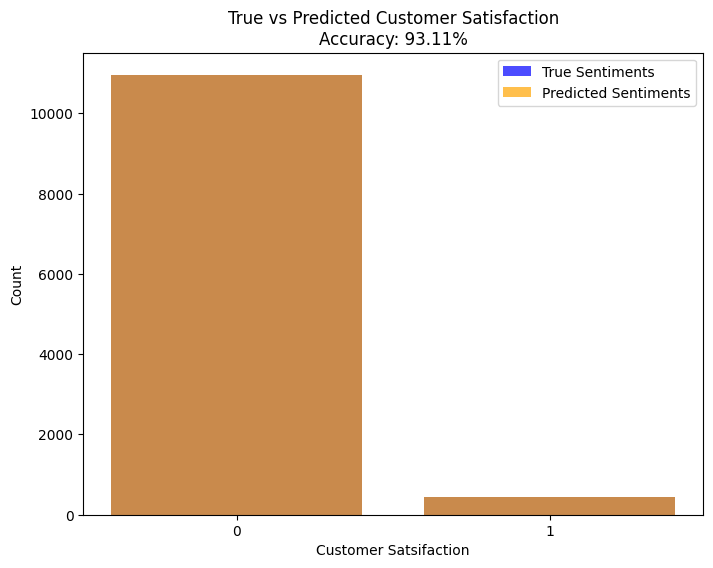

In [97]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(np.arange(len(conf_matrix)), conf_matrix.sum(axis=1), color='blue', alpha=0.7, label='True Sentiments')
ax.bar(np.arange(len(conf_matrix)), conf_matrix.sum(axis=0), color='orange', alpha=0.7, label='Predicted Sentiments')

ax.set_xticks(np.arange(len(conf_matrix)))
ax.set_xticklabels(sorted(y_test.unique()))  
ax.set_xlabel('Customer Satsifaction')
ax.set_ylabel('Count')
ax.set_title(f'True vs Predicted Customer Satisfaction\nAccuracy: {accuracy * 100:.2f}%')
ax.legend()

plt.show()

F1 Score Table:
              precision    recall  f1-score
Class 0        0.963882  0.964410  0.964146
Class 1        0.111617  0.110112  0.110860
accuracy       0.931071  0.931071  0.931071
macro avg      0.537750  0.537261  0.537503
weighted avg   0.930622  0.931071  0.930846


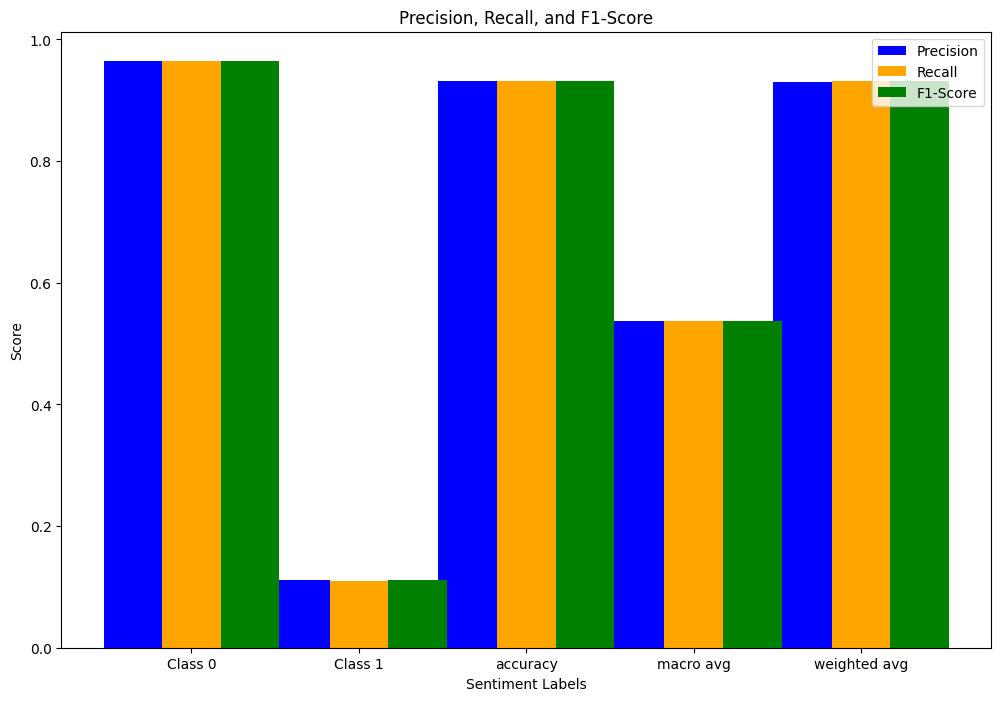

In [98]:
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)

df_class_report = pd.DataFrame(class_report).transpose()

print("F1 Score Table:")
print(df_class_report[['precision', 'recall', 'f1-score']])

# F1
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(df_class_report))
bar1 = ax.bar(index, df_class_report['precision'], bar_width, label='Precision', color='blue')
bar2 = ax.bar(index + bar_width, df_class_report['recall'], bar_width, label='Recall', color='orange')
bar3 = ax.bar(index + 2 * bar_width, df_class_report['f1-score'], bar_width, label='F1-Score', color='green')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(df_class_report.index)
ax.set_xlabel('Sentiment Labels')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score')
ax.legend()

plt.show()

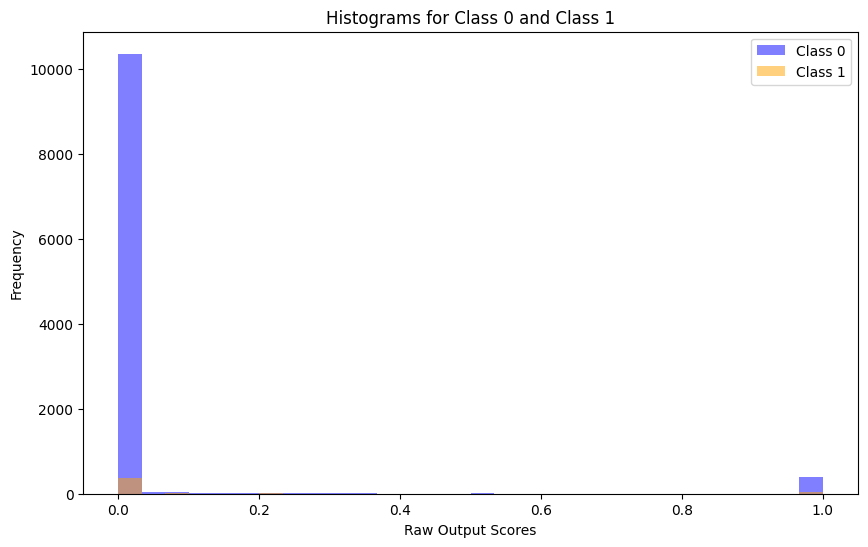

In [99]:
y_scores_dt = model1.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))

# Histogram for Class 0
plt.hist(y_scores_dt[y_test == 0], bins=30, color='blue', alpha=0.5, label='Class 0')

# Histogram for Class 1
plt.hist(y_scores_dt[y_test == 1], bins=30, color='orange', alpha=0.5, label='Class 1')

plt.title('Histograms for Class 0 and Class 1')
plt.xlabel('Raw Output Scores')
plt.ylabel('Frequency')
plt.legend()

plt.show()


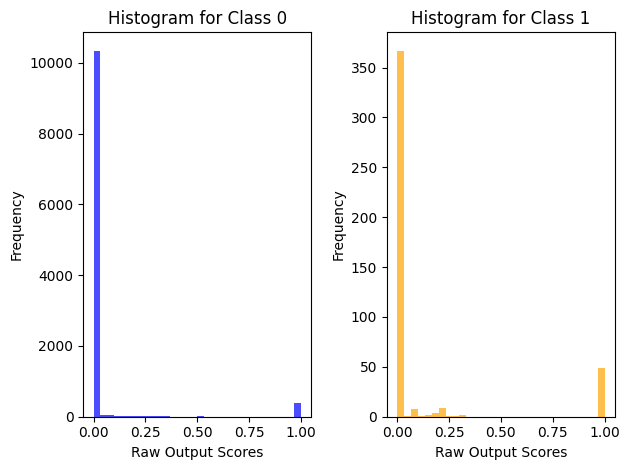

In [100]:
# Histogram for class 0
plt.subplot(1, 2, 1)
plt.hist(y_scores_dt[y_test == 0], bins=30, color='blue', alpha=0.7)
plt.title('Histogram for Class 0')
plt.xlabel('Raw Output Scores')
plt.ylabel('Frequency')

# Histogram for class 1
plt.subplot(1, 2, 2)
plt.hist(y_scores_dt[y_test == 1], bins=30, color='orange', alpha=0.7)
plt.title('Histogram for Class 1')
plt.xlabel('Raw Output Scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

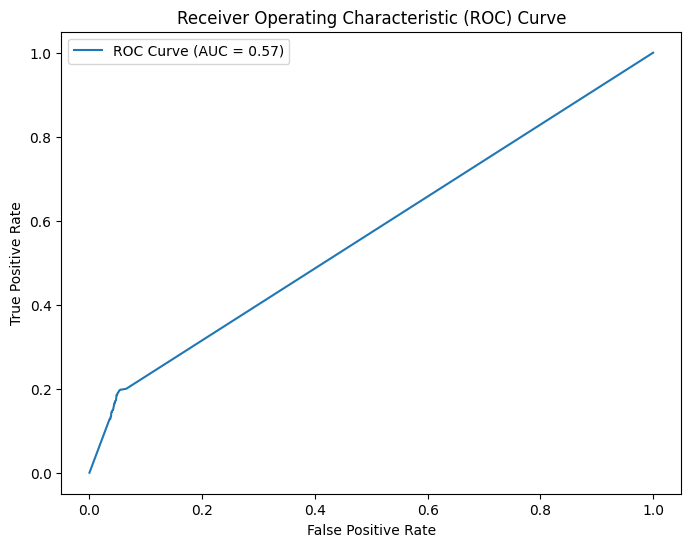

In [101]:
y_val_probs_1 = model1.predict_proba(X_val)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs_1)

# AUC
auc = roc_auc_score(y_val, y_val_probs_1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Attempt to use model on Kaggle challenge pt. 2

In [106]:
data=pd.read_csv("test.csv")
df2=pd.read_csv("test.csv").drop(columns=['ID'])
df2.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [107]:
X_data = df2

df2['TARGET'] = model1.predict(X_data)

In [108]:
df2.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10,1
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72,1
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95,0
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73,1


In [109]:
if 'ID' in data.columns and 'TARGET' in df2.columns:
    result_df = pd.DataFrame({'ID': data['ID'], 'TARGET': df2['TARGET']})

    output_filename = 'target_output.csv'
    result_df.to_csv(output_filename, index=False)

Unsurprisingly, the score given from kaggle for the decision tree model was 0.45057 which is lower than the logistic regression model. Even though the decision tree model had higher accuracy, this is likely because the model overtrained on the training dataset. 